In [1]:
import sys
sys.path.append('..')

In [7]:
import GeneralPDFSymfit as GenPDF
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import symfit
plt.style.use(hep.styles.CMS)

import GeneralPDFSymfit as GenPDF
import Signals_Symfit as Signals
import Backgrounds_Symfit as Backgrounds
import projectionsSymfit as projections
from importlib import reload

In [8]:
mass = symfit.Symbol('m')

In [9]:
cos = symfit.Symbol('cos')

In [10]:
parameters_1Bin = {
    'Signal':{
        'yield':1356,
        'mass':{
            '2Gaussian+CrystalBall':{
                'muCB':5.27,
                'alphaCB':5.2,
                'sigmaCB':0.04,
                'nCB':3,
                'muGauss':5.27,
                'sigmaGauss1': 0.10,
                'sigmaGauss2':0.03,
                'fracCB' : 0.05,
                'fracGauss1':0.25,
                'fracGauss2':0.25
            }
        },
        'angle':{
            'AFB':0, 'FH':0.2,
            'coefsEff':[ 0.1, -0.2, 0.3, -0.4]
        },
    },
    'Background':{
        'yield':1000,
        'mass':{
            'Exponential+Gauss':{
                'mu':5,
                'sigma':0.5,
                'lambda_':-2,
                'fraction_exp':0.3
            }
        },
        'angle':{
            '2SideBands':{
                'Left':{
                    'coefs':[1,0.1,0.1],   'fraction_Cheby':0.5,
                    'mu':0.75,           'sigma':0.1
                },
                'Right':{
                    'coefs':[1, -0.2,-0.2],  'fraction_Cheby':0.5,
                    'mu':0.75,            'sigma':0.1
                },
                'fraction_Left':0.5
            },
        }
        
    },
    'limits': [5, 5.7]
}

In [54]:
GenPDF = reload(GenPDF)
g = GenPDF.gaussian(cos, 0.75, 0.1, [-1,1], norm=True )

In [55]:
import scipy.integrate as integrate


In [62]:
projections = reload(projections)
angular_proj = projections.angularProy_v1(cos, 0.5, 0, 0.2, **parameters_1Bin['Signal']['angle'],  
                                            **parameters_1Bin['Background']['angle']['2SideBands'])

angular_proj_signal = Signals.angularSignal(cos, 0, 0.2, **parameters_1Bin['Signal']['angle'])
angular_proj_back = Backgrounds.angularBackground_SideBands(cos, **parameters_1Bin['Background']['angle']['2SideBands'])



coefs <class 'list'>
fraction_Cheby <class 'float'>
mu <class 'float'>
sigma <class 'float'>
coefs <class 'list'>
fraction_Cheby <class 'float'>
mu <class 'float'>
sigma <class 'float'>
coefs <class 'list'>
fraction_Cheby <class 'float'>
mu <class 'float'>
sigma <class 'float'>
coefs <class 'list'>
fraction_Cheby <class 'float'>
mu <class 'float'>
sigma <class 'float'>


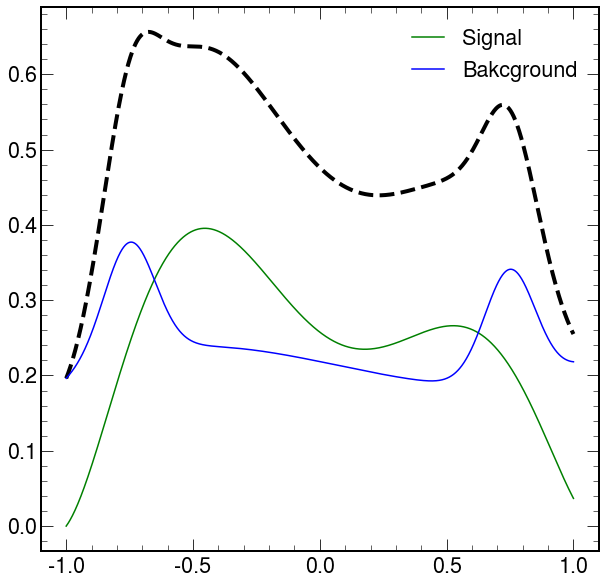

In [63]:
cos_ = np.linspace(-1, 1, 2000)
plt.plot(cos_, angular_proj(cos_) , ls = '--', linewidth=4, color='black')
plt.plot(cos_, 0.5*angular_proj_signal(cos_), label='Signal', color='green' )
plt.plot(cos_, 0.5*angular_proj_back(cos_) , label='Bakcground', color='blue')
plt.legend()

In [11]:
projections = reload(projections)
mass_proj = projections.massProy_v1(mass, 0.5, **parameters_1Bin['Background']['mass']['Exponential+Gauss'], 
                          **parameters_1Bin['Signal']['mass']['2Gaussian+CrystalBall'], 
                                   limits = [5, 5.7])

mass_proj_signal = Signals.CrystalBall_2Gauss(mass,  **parameters_1Bin['Signal']['mass']['2Gaussian+CrystalBall'], limits = [5, 5.7])
mass_proj_back = Backgrounds.Gauss_Exp(mass, **parameters_1Bin['Background']['mass']['Exponential+Gauss'], limits=[5,5.7])

algo
couldn't reduce degree in a polynomial division algorithm when dividing [-1.30794678474867e-111*_u**4 - 5.48201386489442e-95*_u**2 - 2.49414662735738e-79*_u, 0.0] by [-5.01354243811716e-186*_u**9 - 1.26079942143561e-168*_u**7 + 5.73624712057953e-153*_u**6 - 7.92660678907784e-152*_u**5 + 2.40424049465593e-136*_u**4 + 2.73463752048428e-120*_u**3 + 9.16937660006466e-104*_u + 2.78118835956421e-88]. This can happen when it's not possible to detect zero in the coefficient domain. The domain of computation is RR[_u]. Zero detection is guaranteed in this coefficient domain. This may indicate a bug in SymPy or the domain is user defined and doesn't implement zero detection properly.
falling back to numeric integration
9.973556585920894
couldn't reduce degree in a polynomial division algorithm when dividing [-1.30794678474867e-111*_u**4 - 5.48201386489442e-95*_u**2 - 2.49414662735738e-79*_u, 0.0] by [-5.01354243811716e-186*_u**9 - 1.26079942143561e-168*_u**7 + 5.73624712057953e-153*_u**6 - 

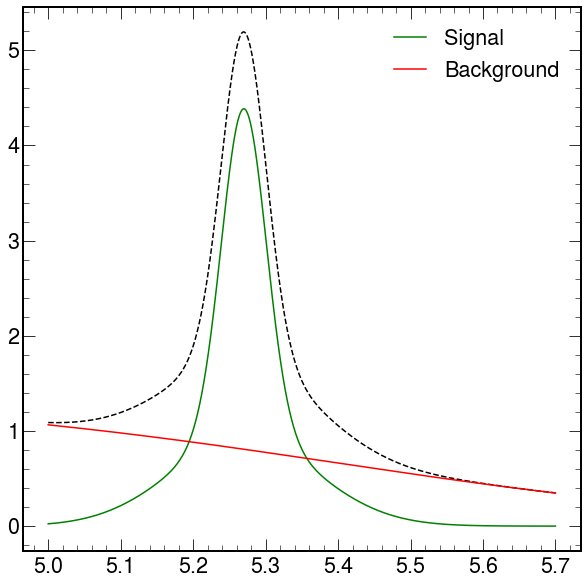

In [79]:
m_ = np.linspace(5, 5.7, 2800)
plt.plot(m_, mass_proj(m_), color='black', ls='--')
plt.plot(m_, 0.5*mass_proj_signal(m_), label='Signal', color='green')
plt.plot(m_, 0.5*mass_proj_back(m_), label='Background', color='red')
plt.legend()
plt.show()


In [5]:
a = 'frac'.split(':')

In [6]:
a

['frac']